<h1>Analyse des trois premiers pics du diffractogramme de ScCuO₂</h1>

<h2>1. Introduction</h2>

Dans ce notebook, on va déterminer les trois premiers pics du diffractogramme de ScCuO₂ en utilisant un rayonnement X incident Cu Kα (λ = 1.54060 Å). Nous associerons chaque pic aux indices (hkl) correspondants, en utilisant la loi de Bragg pour calculer les angles de diffraction.

In [5]:
from mp_api.client import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.analysis.diffraction.xrd import XRDCalculator

mp_key = "emUreNDiEdgEatR8YwlD3hfzF9Onx8tt"
mp_id = "mp-4636"
with MPRester(mp_key) as m:
    structure = m.get_structure_by_material_id(mp_id)
conv_structure = SpacegroupAnalyzer(structure).get_conventional_standard_structure()

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

<h2>2. Théorie de la diffraction des rayons X et de la loi de Bragg </h2>

La diffraction des rayons X est un phénomène qui se produit lorsque des rayons X interagissent avec une structure cristalline. L'angle de diffraction $\theta$ est lié à la distance interplanaires $d_{hkl}$ via la **loi de Bragg** :

$$
n\lambda = 2d_{hkl} \sin(\theta)
$$

où :

- $\lambda$ : longueur d'onde du rayonnement X (ici, Cu Kα avec $\lambda = 1.54060$ Å)
- $d_{hkl}$ : distance interplanaires pour les indices (hkl)
- $\theta$ : angle de diffraction

Les indices (hkl) sont les indices de Miller qui définissent les plans dans le cristal.


<h2>3. Calcul des pics de diffraction</h2>
On va maintenant calculer les pics de diffraction à partir de la structure de ScCuO₂. Pour ce faire, on va utiliser la loi de Bragg. Pour rappel, on va travailler avec la maille conventionnelle.

<Axes: xlabel='$2\\theta$ ($^\\circ$)', ylabel='Intensities (scaled)'>

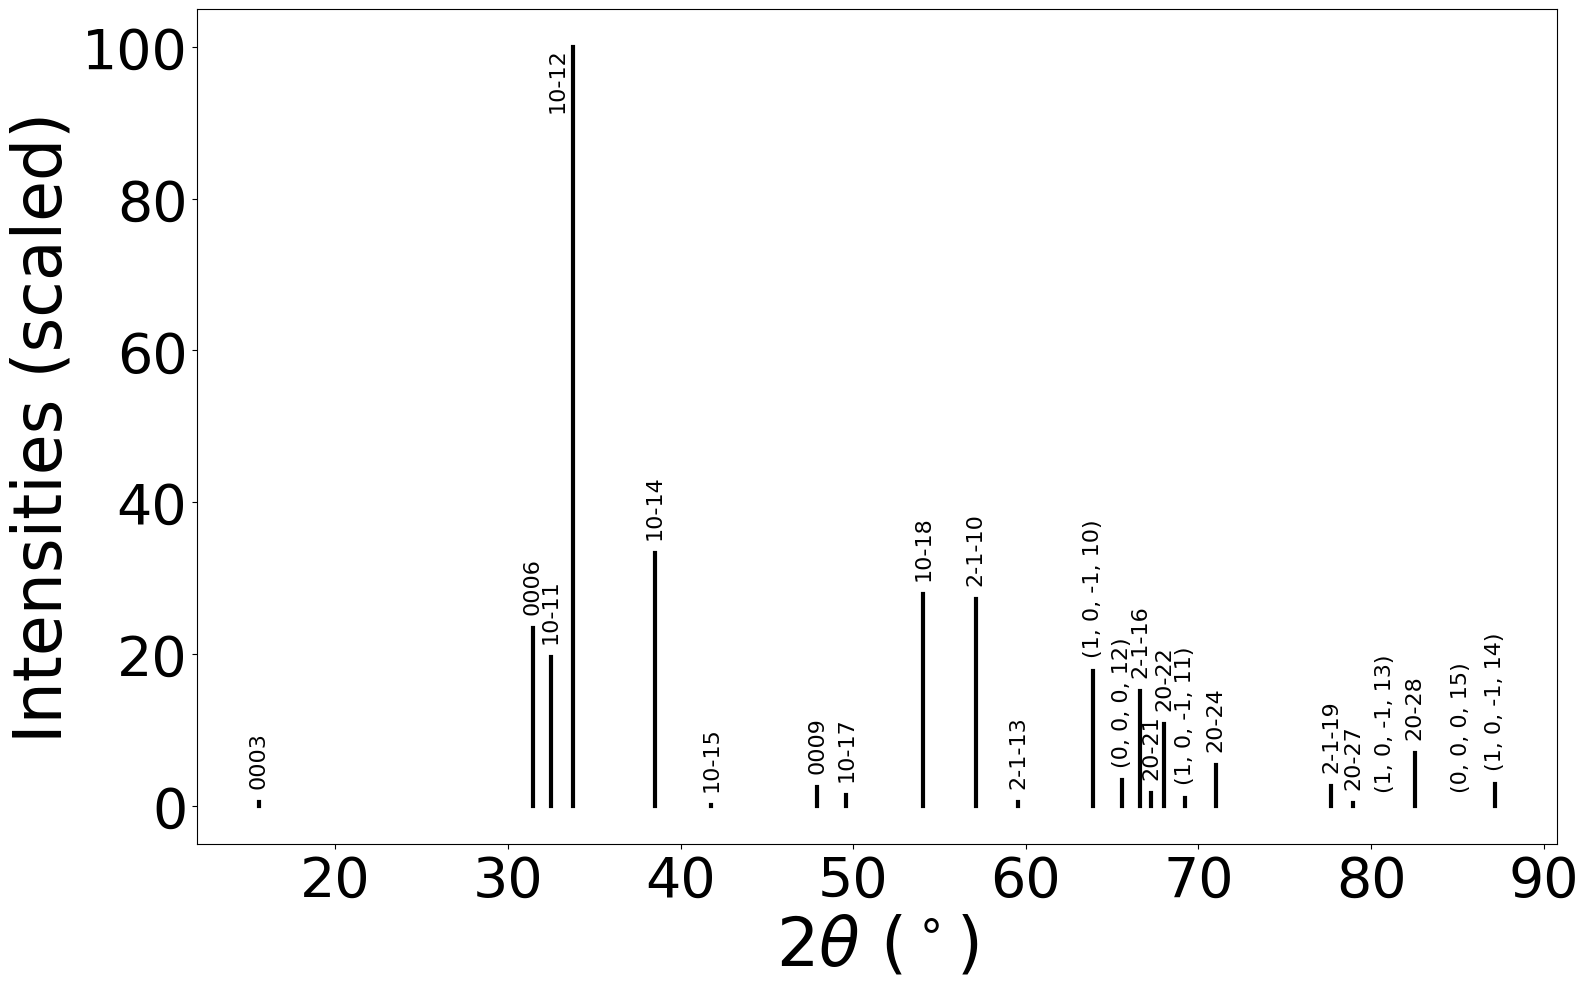

In [24]:
xrd = XRDCalculator(wavelength=1.54060)
xrd_pattern = xrd.get_pattern(conv_structure)
xrd.get_plot(conv_structure)

In [23]:
for i in range(3):
    theta2 = pattern.x[i]
    intensité = pattern.y[i]
    indices_hkl = pattern.hkls[i][0].get("hkl")
    multiplicité = pattern.hkls[i][0].get("multiplicity")
    print("Pour le pic numéro " + str(i+1) +":\n")
    print("- L'angle 2θ vaut: " + str(theta2) +"°\n")
    print("- L'intensité relative de ce pic est de: " +str(intensité) +" (sur une échelle de 0 à 100)\n")
    print("- Les indices (hkl) sont " + str(indices_hkl) +"  et de multiplicité " + str(multiplicité) +"\n\n")

Pour le pic numéro 1:

- L'angle 2θ vaut: 15.562106320554594°

- L'intensité relative de ce pic est de: 0.5103233465544119 (sur une échelle de 0 à 100)

- Les indices (hkl) sont (0, 0, 0, 3)  et de multiplicité 2


Pour le pic numéro 2:

- L'angle 2θ vaut: 31.420882836971018°

- L'intensité relative de ce pic est de: 23.457457083054873 (sur une échelle de 0 à 100)

- Les indices (hkl) sont (0, 0, 0, 6)  et de multiplicité 2


Pour le pic numéro 3:

- L'angle 2θ vaut: 32.4753343546744°

- L'intensité relative de ce pic est de: 19.56410397355072 (sur une échelle de 0 à 100)

- Les indices (hkl) sont (1, 0, -1, 1)  et de multiplicité 12


